## Challenge: Feedback Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
sentiment_raw = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
sentiment_raw.columns = ('review', 'sentiment') 
print(sentiment_raw)

                                                review  sentiment
0    A very, very, very slow-moving, aimless movie ...          0
1    Not sure who was more lost - the flat characte...          0
2    Attempting artiness with black & white and cle...          0
3         Very little music or anything to speak of.            0
4    The best scene in the movie was when Gerardo i...          1
5    The rest of the movie lacks art, charm, meanin...          0
6                                  Wasted two hours.            0
7    Saw the movie today and thought it was a good ...          1
8                                 A bit predictable.            0
9    Loved the casting of Jimmy Buffet as the scien...          1
10                And those baby owls were adorable.            1
11   The movie showed a lot of Florida at it's best...          1
12   The Songs Were The Best And The Muppets Were S...          1
13                                   It Was So Cool.            1
14   This 

In [3]:
negative_words = pd.read_csv('neg_sent.txt', delimiter= '\t', header=None)
# print(negative_words)

# re.findall(r'\w+(?:-\w+)+', negative_words)
# negative_words = negative_words.replace('-', ' ', inplace=False, regex=True)

keywords = ['flat', 'lacks', 'vomit', 'bore', 'boring', 'horrible', 'predictable', 'unfortunately',
            'embarrassing', 'stupid', 'lack', 'lacked', 'lacks', 'bland', 'empty', 'waste', 'wasted',
            'insult', 'slow-moving', 'aimless', 'bad', 'dissappointed', 'dissappointing', 'average', 'low budget',
            'crap', 'doomed', 'lame', 'least', 'unfunny', 'not funny', 'generic', 'lazy', 'worst', 'whiny',
            'pointless', 'annoying', 'nerves', 'unnecessary', 'no warmth', 'not improved', 'not very good',
            'grates on my nerves', 'badly', 'pretentious', 'cliche', 'problem', 'horrendous', 'nothing believable',
            'frustration', 'shallow', 'insincere', 'politically correct', 'lousy', 'embarrassing', 'misplace',
            'misplaced', 'weaker', 'no chemistry', 'slow', 'poor', 'dissapointment', 'cannot', 'could not', 'inept',
           'ineptly', 'stereotypically', 'stereotypical', 'no depth', 'badly', 'worse', 'fodder', 'no plot', 'hate',
           'hated', 'sucked', 'sucks', 'unfortunately', 'inexperience', 'flawed', 'awful', 'disliked', 'depressing',
           'terrible', 'appalling', 'charisthma-free', 'torture', 'atrocity', 'unrecommend', 'suffered', 'drag',
           'below average', 'don\'t', 'unpredictable', ]

# for words in negative_words:
#     sentiment_raw[str(words)] = sentiment_raw.review.str.contains(
#         str(words),
#         case=False
#     )
    
for key in keywords:
    sentiment_raw[str(key)] = sentiment_raw.review.str.contains(
        str(key),
        case=False
    )
# print(sentiment_raw)
# print(negative_words)

In [4]:
sentiment_raw['negative'] = (sentiment_raw['sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

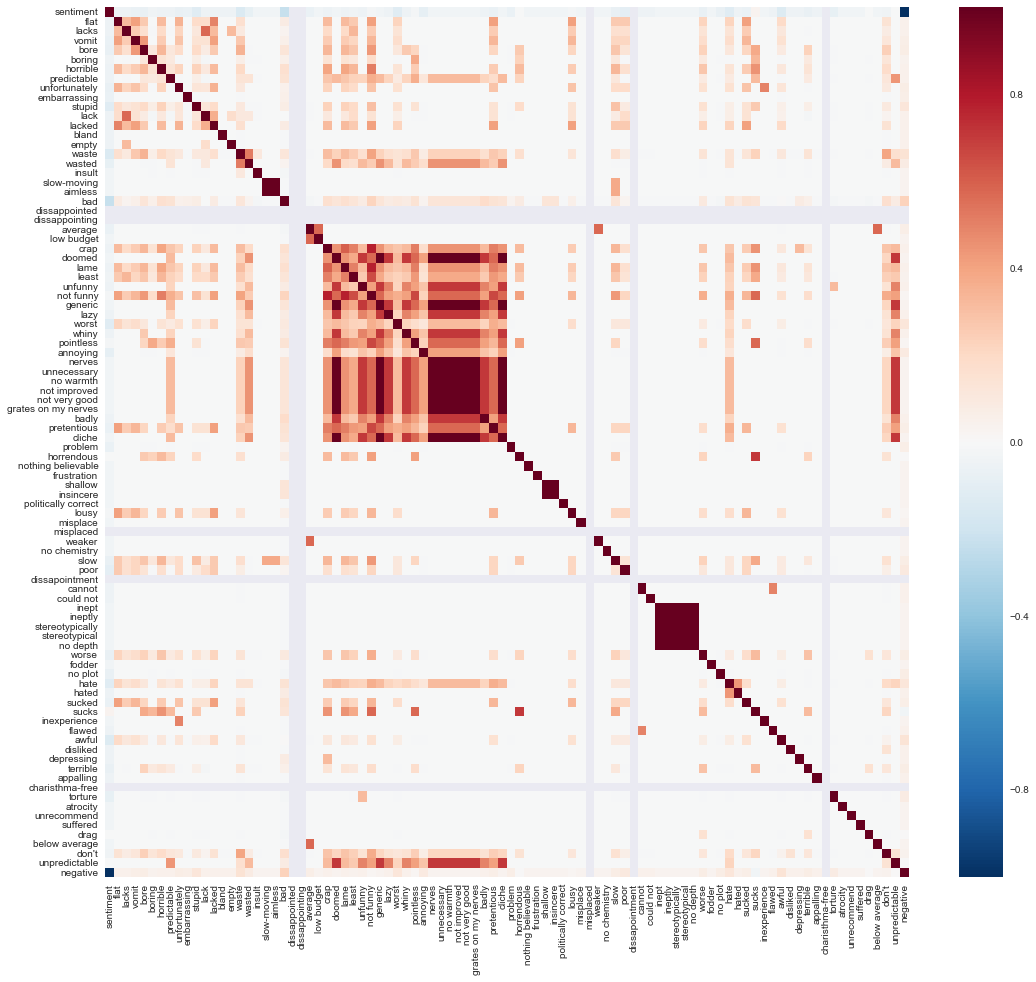

In [5]:
fig, ax = plt.subplots(figsize=(18,16))
sns.heatmap(sentiment_raw.corr(), ax=ax)

In [6]:
data = sentiment_raw[keywords]
target = sentiment_raw['negative']

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

crct_labled = data.shape[0] - (target != y_pred).sum()
accuracy = (crct_labled / data.shape[0]) *  100
print("Your accuracy is {}%".format(accuracy))

Number of mislabeled points out of a total 748 points : 196
Your accuracy is 73.79679144385027%


In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[376,  10],
       [186, 176]])

As we can see, our sensitivity, the number of positives correctly identified, is 176 and our specificity, the number of negatives identified correctly, is 376.  We've had 186 type II errors (false negatives) and 10 Type I errors, also known as false alarms (false positives).  We can see that our ability to correctly identify negative sentiment is 176 out of 362 or 38.6% of the time.  We identify positive sentiment 376 out of 386 or 97.4% of the time.  

In this dataset, our classes are pretty balanced as there are 362 potential negatives and 386 potential positives.  Still, our model will be slightly skewed to identifying positives (in this case, negative sentiment) over negatives as positive sentiment is the dominant class.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.39, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.37, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.38, random_state=0)

X_train.shape, y_train.shape
X_test.shape, y_test.shape
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.72631578947368425

Here, in our attempts to combat overfitting, a holdout group of 38% performs best.

In [10]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, data, target, cv=5)
scores  

array([ 0.76821192,  0.73333333,  0.7114094 ,  0.65771812,  0.7114094 ])

Here, we use scikit-learn to give us a cross-validation score.  Scikit learn is shows the best perfomance of our model at 77% after using 5 holdout groups.

In [11]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.07)
